# Proyecto Final

#  ANN y RNN

Tesla, Inc. diseña, desarrolla, fabrica, alquila y vende vehículos eléctricos y sistemas de generación y almacenamiento de energía en los Estados Unidos, China e internacionalmente. La empresa opera en dos segmentos, Automoción y almacenamiento de energía. Sus productos principales en el mercado son automóviles eléctricos, baterías para almacenamiento de energía, paneles solares y tejas solares. La información utilizada contiene los datos históricos sobre las acciones de la compañia, los cuales estan registrados en Dólares Americanos y registros diarios.

El dataset esta compuestos de 7 columnas, con 2956 registros
-   Date: Fecha de la transacción
-	Open: Precio de la primera transacción del día
-	High: precio más alto del día
-	Low: Precio más bajo de día
-	Close: Precio de la última transacción del día
-	Adj Close: Precio de cierre ajustado para reflejar el valor después de contabilidar cualquier acción
-	Volume: Número de unidades negociadas en el día

Con los datos proporcionado se realizará la predicción de un modelo de regresión de los precios de las acciones, con base a los registros historicos de los precios diario de acciones, contiene datos a partir del 28 de junio de 2010 al 22 de marzo de 2022. Exploraremos el conjunto de datos para realizar el análisis y comprender el comportamiento histórico de las acciones de Tesla en el mercado de valores.

In [53]:
# Importamos las librerias a utilizar
import numpy as np 
import pandas as pd
import os
import plotly.graph_objects as go
from keras.models import Sequential
import keras
from summarytools  import dfSummary

In [2]:
# En el siguiente código importaremos nuestro dataset que está en formato csv

dataset = pd.read_csv('TSLA.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


Realización de ingeniería de características, el primer paso aseguarar que los campos no tengan registros nulos y si tienen no soprepasen el 5 % de lo contrario se eliminan

In [3]:
cols_rescatables = [col for col in dataset.columns if (dataset[col].isnull().mean() <= 0.05)]
cols_rescatables

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [4]:
dataset1 = dataset[cols_rescatables].dropna()
dataset.shape, dataset1.shape

((2956, 7), (2956, 7))

Se verificó que la data está integra ya que no se identificó campos con registros nulos, debido a que se obtuvo el mismo resultado, por ende se utilizará la data original

El siguiente script proporcionará un resumen de las variables que tiene el dataset

In [5]:
dfSummary(dataset)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Date[object],1. 2010-06-292. 2018-05-023. 2018-04-194. 2018-04-205. 2018-04-236. 2018-04-247. 2018-04-258. 2018-04-269. 2018-04-2710. 2018-04-3011. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)2,946 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACCklEQVR4nO3asW3EMBQFQVJwyFS4Ds71uAL17dx1yDWcEmKBmQoILPADPc37vgdNx+4H8Jx4YeKFiRcmXph4YeKFHXPO792P4JljjPHe/QiecTbDxAsTL0y8MPHCxAsTL0y8MPHCxAs7xhi/ux/BM9MPSF3OZphJKMwkFOZshokXJl6YeGHihYkXJl6YeGHihYkXZhIKMwmFOZthJqEwk1CYsxkmXph4YeKFiRcmXph4YeKFiRcmXphJKMwkFOZshpmEwkxCYc5mmHhh4oWJFyZemHhh4oWJFyZemHhhJqEwk1CYsxlmEgozCYU5m2HihYkXJl6YeGHihYkXJl6YeGHihZmEwkxCYc5mmEkozCQU5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGmYTCTEJhzmaYeGHihYkXJl6YeGHihYkXJl6YeGHihdnzwux5Yc5mmD0vzJ4X5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGzfM8f9Zar90P4XNfa63XdV1/ux/C55zNMPHCxAsTL0y8MPHCxAsTL0y8MPHCfNsMMwmFOZth4oWJFyZemHhh4oX9A5gQNK7t5DBkAAAAAElFTkSuQmCC"">",0(0.0%)
2,Open[float64],Mean (sd) : 138.7 (250.0)min < med < max:3.2 < 46.7 < 1234.4IQR (CV) : 48.4 (0.6),"2,666 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABFklEQVR4nO3cMY6CQBhAYdyY0PzbYrGNmQvs3sPKE9B6JjpO4JVsLKSmISHBE5CMcdbd+N7XMpn84TGUs1mWpdL7+/jrAfQa27UHTdMcI2KXs8k4jrdhGM7lxlJpq6EjYte27TVnk77vv8qNpN/grxvC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGWL0L9J0RL7QtEnqapp+U0iln7X94ccQLbYuEruv6M/fFdV13SCnlnqZ9RFxKr53n+buqqqx5H/yIs2d4dP2zB+QOsQpK2WHLUyoAAAAASUVORK5CYII="">",0(0.0%)
3,High[float64],Mean (sd) : 141.8 (255.9)min < med < max:3.3 < 47.5 < 1243.5IQR (CV) : 49.0 (0.6),"2,662 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABFklEQVR4nO3cMY6CQBhAYdyY0PzbYrGNmQvs3sPKE9B6JjpO4JVsLKSmISHBE5CMcdbd+N7XMpn84TGUs1mWpdL7+/jrAfQa27UHTdMcI2KXs8k4jrdhGM7lxlJpq6EjYte27TVnk77vv8qNpN/grxvC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGWL0L9J0RL7QtEnqapp+U0iln7X94ccQLbYuEruv6M/fFdV13SCnlnqZ9RFxKr53n+buqqqx5H/yIs2d4dP2zB+QOsQpK2WHLUyoAAAAASUVORK5CYII="">",0(0.0%)
4,Low[float64],Mean (sd) : 135.4 (243.8)min < med < max:3.0 < 45.8 < 1217.0IQR (CV) : 47.8 (0.6),"2,672 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABEklEQVR4nO3cIW7DQBBA0baKZIMpdUBItRdI7hHUEyztmcx8grKep6QgxiZGzgksbZRNGuX/R71ajfwtw3ldluVFz+/tvwfQfWzWHnRd9xkR25JLpmk6jeP4XW8s1bYaOiK2Oee/kkuGYdjVG0m34K8bwtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0xOrS10vM83xIKX2VnH2ETcDEzcVVQjdN8166Cbjv+2NKqfQlf0TEb+2zbdvuc84/JWdvNe+l56/94M7G40Nby+tlyQAAAABJRU5ErkJggg=="">",0(0.0%)
5,Close[float64],Mean (sd) : 138.8 (250.1)min < med < max:3.2 < 46.5 < 1229.9IQR (CV) : 48.5 (0.6),"2,764 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABFklEQVR4nO3cMY6CQBhAYdyY0PzbYrGNmQvs3sPKE9B6JjpO4JVsLKSmISHBE5CMcdbd+N7XMpn84TGUs1mWpdL7+/jrAfQa27UHTdMcI2KXs8k4jrdhGM7lxlJpq6EjYte27TVnk77vv8qNpN/grxvC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYG

Del resumen anterior se identificó que la variable con mayor promedio es el volumen de los precios de los vehiculos donde ocurrió en el 2018

In [6]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


## Verificación de valores nulos

In [7]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='Open', ylabel='Count'>

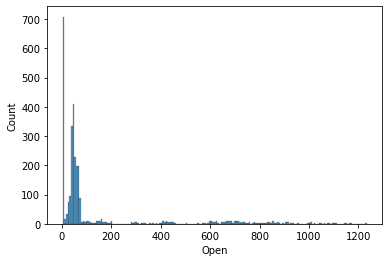

In [9]:
sns.histplot(data = dataset, x='Open')

<AxesSubplot:xlabel='High', ylabel='Count'>

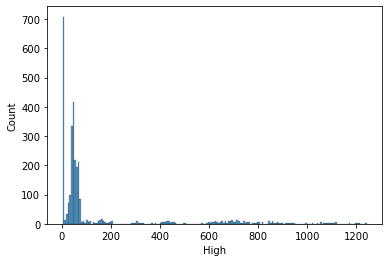

In [10]:
sns.histplot(data = dataset, x='High')

<AxesSubplot:xlabel='Low', ylabel='Count'>

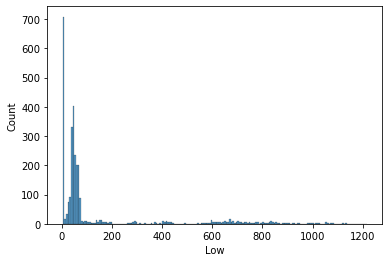

In [11]:
sns.histplot(data = dataset, x='Low')

<AxesSubplot:xlabel='Close', ylabel='Count'>

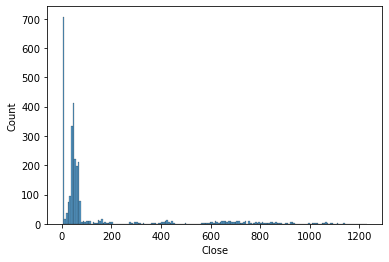

In [12]:
sns.histplot(data = dataset, x='Close')

<AxesSubplot:xlabel='Adj Close', ylabel='Count'>

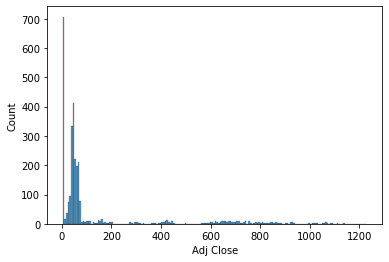

In [13]:
sns.histplot(data = dataset, x='Adj Close')

No se encontró valores nulos en el dataset

A continuación se mostrará el comportamiento de los precios a través de un grafico de velas (candlestick chart en inglés) muestra la información de precios en un período de tiempo específico de una manera visualmente comprensible

In [14]:
start_index = 500
end_index = None  
selected_data = dataset.iloc[start_index:end_index]

fig = go.Figure(data=[go.Candlestick(x=selected_data['Date'],
                open=selected_data['Open'],
                high=selected_data['High'],
                low=selected_data['Low'],
                close=selected_data['Adj Close'])])

fig.update_layout(
    title='Gráfico de velas',
    xaxis_title='Fecha',
    yaxis_title='Precio',
)

# Muestra el gráfico
fig.show()


En la siguiente línea de código nos aseguraremos que la variable que se utilizará para predecir (Adj Close), esté en el formato correcto

In [15]:
dataset['Adj Close'].dtype

dtype('float64')

Verificación del tipo de datos del precio.

La Prueba de Dickey-Fuller Aumentada (ADF) es una herramienta estadística para analizar la serie de tiempo de los precios de los vehiculos e identificar, si exhibe una tendencia estocástica o no estacionaria.

In [16]:
from statsmodels.tsa.stattools import adfuller

# prueba ADF
adf_result = adfuller(dataset['Adj Close'].values, autolag='AIC')

# resultados de la prueba
print("Prueba de Dickey-Fuller Aumentada (ADF)")
print("---------------------------------------")
print(f"Estadística ADF: {adf_result[0]}")
print(f"Valor p: {adf_result[1]}")
print("Valores críticos:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

# Interpretación de los resultados
print("---------------------------------------")
if adf_result[1] <= 0.05:
    print("Conclusion: El valor p es menor o igual a 0.05, por lo que rechazamos la hipótesis nula.")
    print("La serie temporal es estacionaria.")
else:
    print("Conclusion: El valor p es mayor a 0.05, por lo que no podemos rechazar la hipótesis nula.")
    print("La serie temporal no es estacionaria.")


Prueba de Dickey-Fuller Aumentada (ADF)
---------------------------------------
Estadística ADF: 1.4239415939225963
Valor p: 0.9972202364261444
Valores críticos:
   1%: -3.4325860929804404
   5%: -2.8625279573644873
   10%: -2.5672959172141048
---------------------------------------
Conclusion: El valor p es mayor a 0.05, por lo que no podemos rechazar la hipótesis nula.
La serie temporal no es estacionaria.


# Función de autocorrelación

A continuación se desarrollará las funciones de autocorrelación  para identificar los patrones en una serie de tiempo para ver si existe una autocorrelación con los datos anteriores

c:\Users\Andrea\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



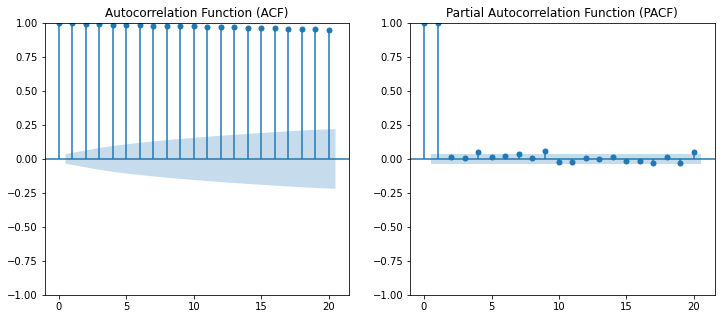

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

def plot_acf_pacf(data, lags=None):
   
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Gráfico ACF
    plot_acf(data, lags=lags, ax=ax1)
    ax1.set_title('Autocorrelation Function (ACF)')

    # Gráfico PACF
    plot_pacf(data, lags=lags, ax=ax2)
    ax2.set_title('Partial Autocorrelation Function (PACF)')

    plt.show()

# conjunto de datos con un nombre más descriptivo
df = dataset['Adj Close']

# Muestra los gráficos ACF y PACF
plot_acf_pacf(df, lags=20)


En el grafico anterior se pudo  analisar mejor los precios de cierre de las acciones de los vehiculos en el grafico de de ACF ya que se aprecia el procentaje no sobrepasa en 25 %

# Construcción de los modelos de red neuronal ANN Y RNN

# ANN - Artificial Neural Network

Primero se evaluaremos la variable que nos servirá para el modelo de la serie de tiempo el cual es: Adj Close

In [18]:
data = dataset['Adj Close'].values
print('Shape of data: ', data.shape)

Shape of data:  (2956,)


Construcción del modelo en donde utilizaremos el 80 % de entrenamiento y el resto (20 %) se utilizará para la prueba

In [19]:
# longitud de entrenamiento como el 80% de los datos
train_length = int(len(data) * 0.8)

# Datos en conjuntos de entrenamiento y prueba
train_data, test_data = data[:train_length], data[train_length:]

# Imprime la longitud del conjunto de entrenamiento
print('Train length:', train_length)

# Imprime las formas de los conjuntos de entrenamiento y prueba
print('Shape of Train data:', train_data.shape)
print('Shape of Test data:', test_data.shape)


Train length: 2364
Shape of Train data: (2364,)
Shape of Test data: (592,)


Reaorganización la estructura de datos utilizando el np.reshape de numpy

In [20]:
train_data = np.reshape(train_data, (-1, 1))
test_data = np.reshape(test_data, (-1, 1))

# Imprime las formas de los conjuntos de entrenamiento y prueba
print(f'Shape of Train data: {train_data.shape}')
print(f'Shape of Test data: {test_data.shape}')


Shape of Train data: (2364, 1)
Shape of Test data: (592, 1)


Creación de una función para analizar la serie de tiempo que servirá para ver la autocorrelación

In [21]:
def create_dataset(dataset, lookback):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookback -1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        b = dataset[i+lookback, 0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

c:\Users\Andrea\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



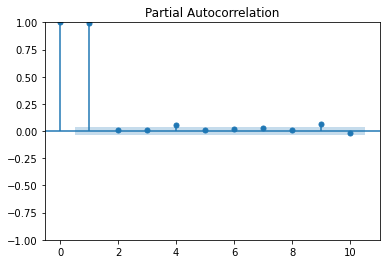

In [22]:
plot_pacf(data, lags=10)
plt.show()

Importaremos la librería "pacf", ésta es una herramienta estadística que se utiliza en el análisis de series temporales para entender la correlación entre los valores de una serie en diferentes rezagos, controlando o eliminando el efecto de los rezagos intermedios.

In [23]:
from statsmodels.tsa.stattools import pacf

Utilizando la siguiente función pacf, utilizando 20 rezagos calcularemos cuantas regresiones son superiores al 10 %

In [24]:
pacf_value = pacf(data, nlags=20)
lag = 0

for x in pacf_value:
    if x > 0.1:
        lag += 1
    else:
        break
print('Selected look_back (or lag = ): ', lag)


Selected look_back (or lag = ):  2


In [25]:
train_X, train_y = create_dataset(train_data, lag)
test_X, test_y = create_dataset(test_data, lag)

Ya identifcado los rezagos, se le añadirá en el modelo tanto para la prueba como para el entrenamiento

In [26]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (2361, 2) (2361,)
Shape of test_X and test_y:  (589, 2) (589,)


Se imprimirá como quedó el modelo, en donde se hace la comparativa de lo original con lo calculado por el modelo

In [27]:
print(train_data[:20])
for x in range(len(train_X[:20])):
    print(test_X[x], test_y[x], ) 

[[4.778]
 [4.766]
 [4.392]
 [3.84 ]
 [3.222]
 [3.16 ]
 [3.492]
 [3.48 ]
 [3.41 ]
 [3.628]
 [3.968]
 [3.978]
 [4.128]
 [4.382]
 [4.06 ]
 [4.044]
 [4.2  ]
 [4.258]
 [4.19 ]
 [4.11 ]]
[69.998001 71.903999] 70.444
[71.903999 70.444   ] 70.966003
[70.444    70.966003] 66.608002
[70.966003 66.608002] 67.267998
[66.608002 67.267998] 65.783997
[67.267998 65.783997] 66.258003
[65.783997 66.258003] 65.987999
[66.258003 65.987999] 66.973999
[65.987999 66.973999] 67.239998
[66.973999 67.239998] 66.606003
[67.239998 66.606003] 66.073997
[66.606003 66.073997] 67.178001
[66.073997 67.178001] 67.905998
[67.178001 67.905998] 69.767998
[67.905998 69.767998] 70.540001
[69.767998 70.540001] 71.935997
[70.540001 71.935997] 71.678001
[71.935997 71.678001] 76.300003
[71.678001 76.300003] 75.797997
[76.300003 75.797997] 78.629997


Para inicar la estructura del modelo, se eligió 7 semillas para ver su comportamiento

In [28]:
np.random.seed(7)

Se importará las librerías de secuencia, desnidad y ativación de tensorflow para constuir las capas de la rede neuronal

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.models import Sequential
import keras

El siguiente código servirá para construir la red nueronal, la cual estará conformada por 2 capas densas una con 64 neuronas la de entrada y una neurona la de salida, esta última se eligió con una neurona porque es un modelo de regresión, si hubiera sido uno de claisficación con múltiples opciones, se agregaría más neuronas 

In [30]:
# Creando un modelo secuencial
model = Sequential()

# Capa oculta 1
model.add(Dense(64, input_dim=lag, activation='relu', name='1st_hidden'))

# Capa de salida
model.add(Dense(1, name='Output_layer', activation='linear'))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Resumen del modelo
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_hidden (Dense)          (None, 64)                192       
                                                                 
 Output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Ejecución la red nueuronal, utilizando 100 épocas y 64 batches de los daos validando con el 0.1

In [31]:
epoch_number = 100
batches = 64

history = model.fit(train_X, train_y, epochs = epoch_number, batch_size = batches, verbose = 1, shuffle=False, 
                    validation_split=0.1)

Epoch 1/100


34/34 [==============================] - 1s 5ms/step - loss: 1311.5398 - val_loss: 1360.7106
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 333.6850 - val_loss: 304.6422
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 47.5915 - val_loss: 33.4779
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 3.6357 - val_loss: 5.2900
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9615 - val_loss: 4.8317
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9760 - val_loss: 4.7985
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9613 - val_loss: 4.7710
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9536 - val_loss: 4.7469
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9437 - val_loss: 4.7249
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9359 - val_loss: 4.7029
Epoch 11/

Comparativo de la estructura de la red neuronal de las epocas de marge de perdida entre el modelo de entrenamiento y el de prueba

<Figure size 432x288 with 0 Axes>

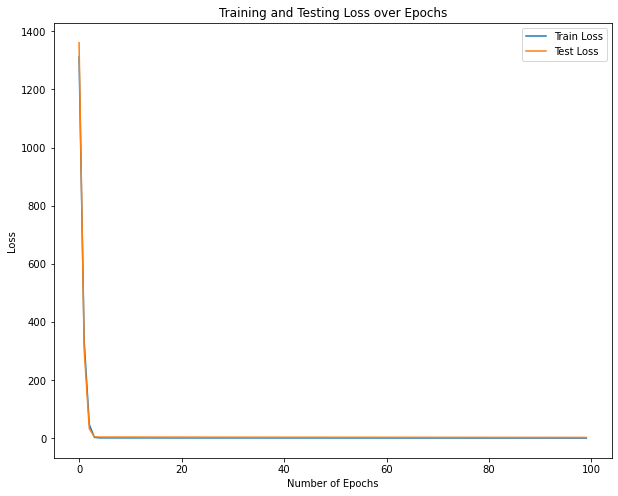

In [32]:

plt.clf()

# Tamaño de la figura
plt.figure(figsize=(10, 8))

# Datos de entrenamiento y prueba
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Gráfico de entrenamiento y prueba
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')

# Etiquetas y título
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')

# Leyenda con nombres de series
plt.legend()

# Gráfico
plt.show()


En el resultado del gráfico anterior se constató que en las primeras 3 epocas la diferencia de peridad por lo que no era necesario utilizar más de lo indicado

In [33]:
# Realizar predicciones en el conjunto de prueba
test_predictions = model.predict(test_X)


19/19 [==============================] - 0s 255us/step


In [34]:
test_predictions[:15]

array([[71.41024 ],
       [70.803375],
       [70.823235],
       [67.703514],
       [67.09263 ],
       [66.15238 ],
       [66.130356],
       [66.04889 ],
       [66.71627 ],
       [67.16439 ],
       [66.75867 ],
       [66.201164],
       [66.89027 ],
       [67.713005],
       [69.28672 ]], dtype=float32)

Con el siguiente código, obtendremos el punteo de la prueba de la red neuronal 

In [35]:
import math
from sklearn.metrics import mean_squared_error

testScore = math.sqrt(mean_squared_error(test_y[:], test_predictions[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Test Score: 25.68 RMSE


Forma gráfica de la comparativa de predicción vs los datos reales del modelo, para verificar el resultado si es optimo o no

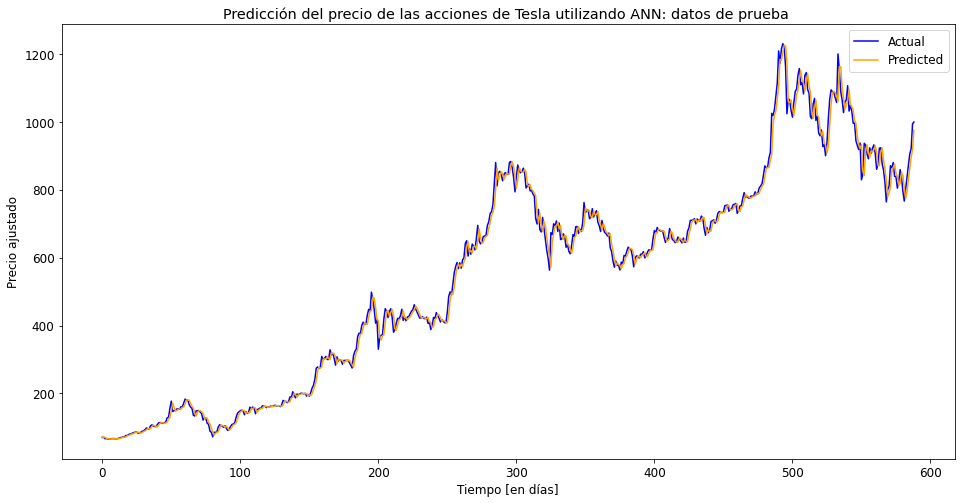

In [36]:
# Crear una figura
plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 12})

# Trazar los datos reales en azul
plt.plot(test_y[:], color='blue', label='Actual')

# Trazar las predicciones en naranja
plt.plot(test_predictions[:, 0], color='orange', label='Predicted')

# Título del gráfico
plt.title('Predicción del precio de las acciones de Tesla utilizando ANN: datos de prueba ')
plt.xlabel('Tiempo [en días]')
plt.ylabel('Precio ajustado')

# Leyenda con etiquetas claras
plt.legend(['Actual', 'Predicted'])

# Mostrar el gráfico
plt.show()


# RNN - Recurrent Neural Network

In [37]:
data = dataset['Adj Close'].values
print('Shape of data: ', data.shape)

Shape of data:  (2956,)


Dividrá del conjunto de datos en el conjunto que se utlizara de prueba y de entrenamiento, el cual éste último será del 80%

In [38]:
# Calcula la longitud del conjunto de entrenamiento como el 80% de los datos
train_length = int(len(data) * 0.8)

# Imprime la longitud del conjunto de entrenamiento
print('Train length:', train_length)

# Divide los datos en conjuntos de entrenamiento y prueba
train_data, test_data = data[:train_length], data[train_length:]

# Imprime las formas (longitud) de los conjuntos de entrenamiento y prueba
print('Shape of Train data:', train_data.shape)
print('Shape of Test data:', test_data.shape)


Train length: 2364
Shape of Train data: (2364,)
Shape of Test data: (592,)


Se crea una función para ver la secuencia de los ejes

In [39]:
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [40]:
lag = 2 
n_features = 1

In [41]:
train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

In [42]:
print(f'Shape of train_X: {train_X.shape}, train_y: {train_y.shape}')
print(f'Shape of test_X: {test_X.shape}, test_y: {test_y.shape}')


Shape of train_X: (2362, 2), train_y: (2362,)
Shape of test_X: (590, 2), test_y: (590,)


In [43]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

Resultado del modelo de entrenamiento el cual está conformado por 2 lag y una característica

In [44]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (2362, 2, 1) (2362,)
Shape of test_X and test_y:  (590, 2, 1) (590,)


In [45]:
# Se importará las librerías de densidad, secuencia, simplicidad y el LSTM

from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dense

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Definir el modelo Sequential
model = Sequential()

# Capa SimpleRNN con 64 unidades y función de activación ReLU
model.add(SimpleRNN(64, activation='relu', return_sequences=False, input_shape=(lag, n_features)))

# Capa de salida con una función de activación lineal para regresión
model.add(Dense(1, activation='linear'))

# Compilar el modelo con el optimizador 'adam' y la pérdida 'mse' (error cuadrático medio)
model.compile(optimizer='adam', loss='mse')

# Resumen del modelo
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Se importa la librería tensorflow para realizar un análisis más profundo

In [47]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [48]:
# Entrenar el modelo
history = model.fit(
    x=train_X,  
    y=train_y,  
    epochs=50,  
    batch_size=64,  
    verbose=1,  
    validation_split=0.1  
)


Epoch 1/50
 1/34 [..............................] - ETA: 3s - loss: 1727.9453

c:\Users\Andrea\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:265: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



 5/34 [===>..........................] - ETA: 1s - loss: 1562.7239

34/34 [==============================] - 1s 26ms/step - loss: 905.1887 - val_loss: 471.4257
Epoch 2/50
34/34 [==============================] - 1s 19ms/step - loss: 82.1257 - val_loss: 4.8805
Epoch 3/50
34/34 [==============================] - 1s 19ms/step - loss: 2.8593 - val_loss: 4.6906
Epoch 4/50
34/34 [==============================] - 1s 19ms/step - loss: 1.8801 - val_loss: 4.6083
Epoch 5/50
34/34 [==============================] - 1s 20ms/step - loss: 1.8613 - val_loss: 4.6048
Epoch 6/50
34/34 [==============================] - 1s 20ms/step - loss: 1.8580 - val_loss: 4.5863
Epoch 7/50
34/34 [==============================] - 1s 19ms/step - loss: 1.8292 - val_loss: 4.4645
Epoch 8/50
34/34 [==============================] - 1s 20ms/step - loss: 1.7922 - val_loss: 4.4397
Epoch 9/50
34/34 [==============================] - 1s 21ms/step - loss: 1.7797 - val_loss: 4.4047
Epoch 10/50
34/34 [==============================] - 1s 19ms/step - loss: 1.7696 - val_loss: 4.4037
Epoch 11/50
34/

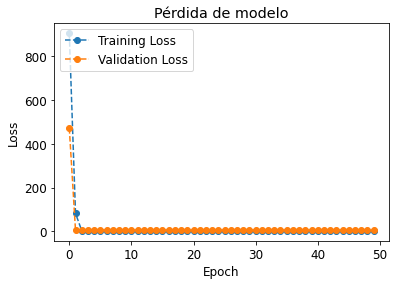

In [49]:
# Historia de pérdida en el entrenamiento y la validación
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Gráfico de pérdida del modelo
plt.plot(train_loss, label='Training Loss', linestyle='--', marker='o')
plt.plot(val_loss, label='Validation Loss', linestyle='--', marker='o')

plt.title('Pérdida de modelo')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()


In [50]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

19/19 [==============================] - 0s 5ms/step
Shape of train and test predict:  (2362, 1) (590, 1)


Cálculo del error cuadratico del modelo para comparar los valroes reales con los predichos utilizando el Train RMSE

In [51]:
import math
from sklearn.metrics import mean_squared_error

def calculate_rmse(actual, predicted):
    """
    Calculando el error cuadrático medio (RMSE) entre los valores reales y predichos.

    """
    return math.sqrt(mean_squared_error(actual, predicted))

# Calcular el RMSE para los conjuntos de entrenamiento y prueba
train_rmse = calculate_rmse(train_y, train_predict)
test_rmse = calculate_rmse(test_y, test_predict)

# Imprimir el RMSE
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')


Train RMSE: 1.33
Test RMSE: 26.51


Resultado de precisión de la red neuronal de los valores calculados vs los predichos, donde se hace la comparativa de días vs el comportamiento de los precios

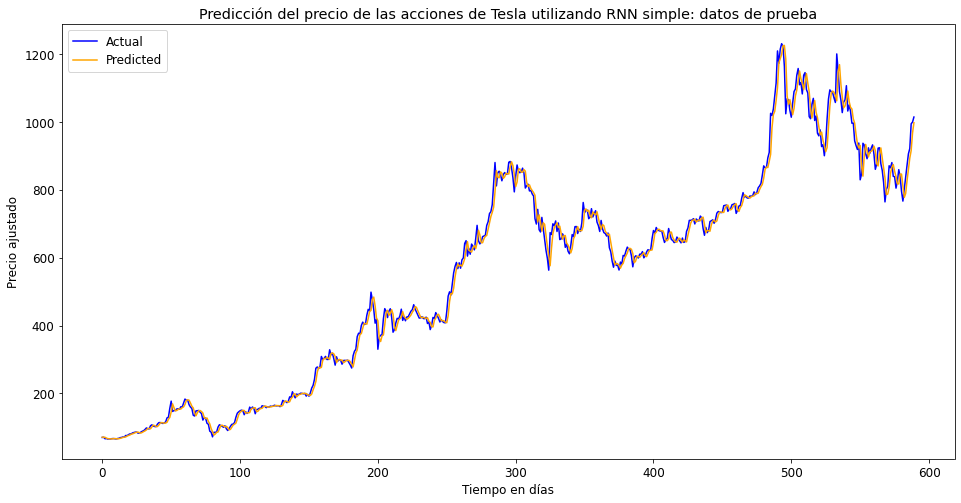

In [52]:
plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 12})


# Trazar los datos reales en azul
plt.plot(test_y[:], color='blue', label='Actual')

# Trazar las predicciones en naranja
plt.plot(test_predict[:, 0], color='orange', label='Predicted')

# Gráfico de los datos reales y predicciones
# plt.plot(test_y, label='Actual', linestyle='--', marker='o')
# plt.plot(test_predict, label='Predicted', linestyle='--', marker='o')

plt.xlabel('Tiempo en días')
plt.ylabel('Precio ajustado')
plt.title('Predicción del precio de las acciones de Tesla utilizando RNN simple: datos de prueba')

plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()

# Conclusión

Con base a los reusltados obtenidos de los dos modelos el ANN y RNN, llegamos a la conslusión de elegir el modelo RNN debido a que predice los datos con mayor presición pero por una mínima diferencia ya que el modelo ANN tambien predice con una aceptable precisión.